#Image Segmentation

In [ ]:
!pip install scikit-image==0.21.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 29.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Attempting uninstall: imageio
    Found existing installation: imageio 2.25.1
    Uninstalling imageio-2.25.1:
      Successfully uninstalled imageio-2.25.1
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from skimage import data, segmentation, color
from skimage import graph, io
import matplotlib.pyplot as plt

## Load Image

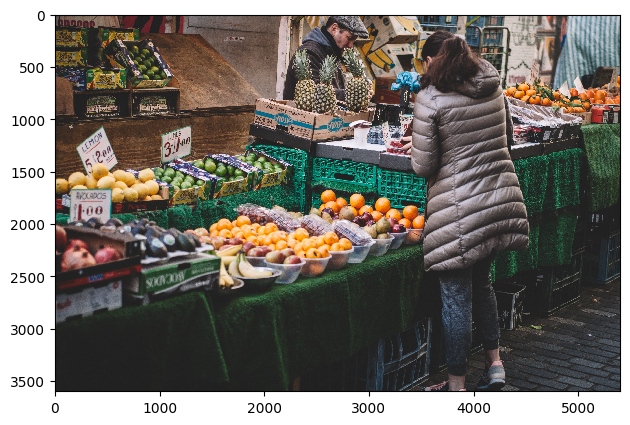

In [ ]:
# Load a sample image
image = io.imread('/content/drive/MyDrive/OAE5133: Image Proc/Tutorial 3/clem-onojeghuo--pyjPVh77uE-unsplash.jpg')
io.imshow(image)
plt.show()

## Segment image based on graph cut or normalized cut method

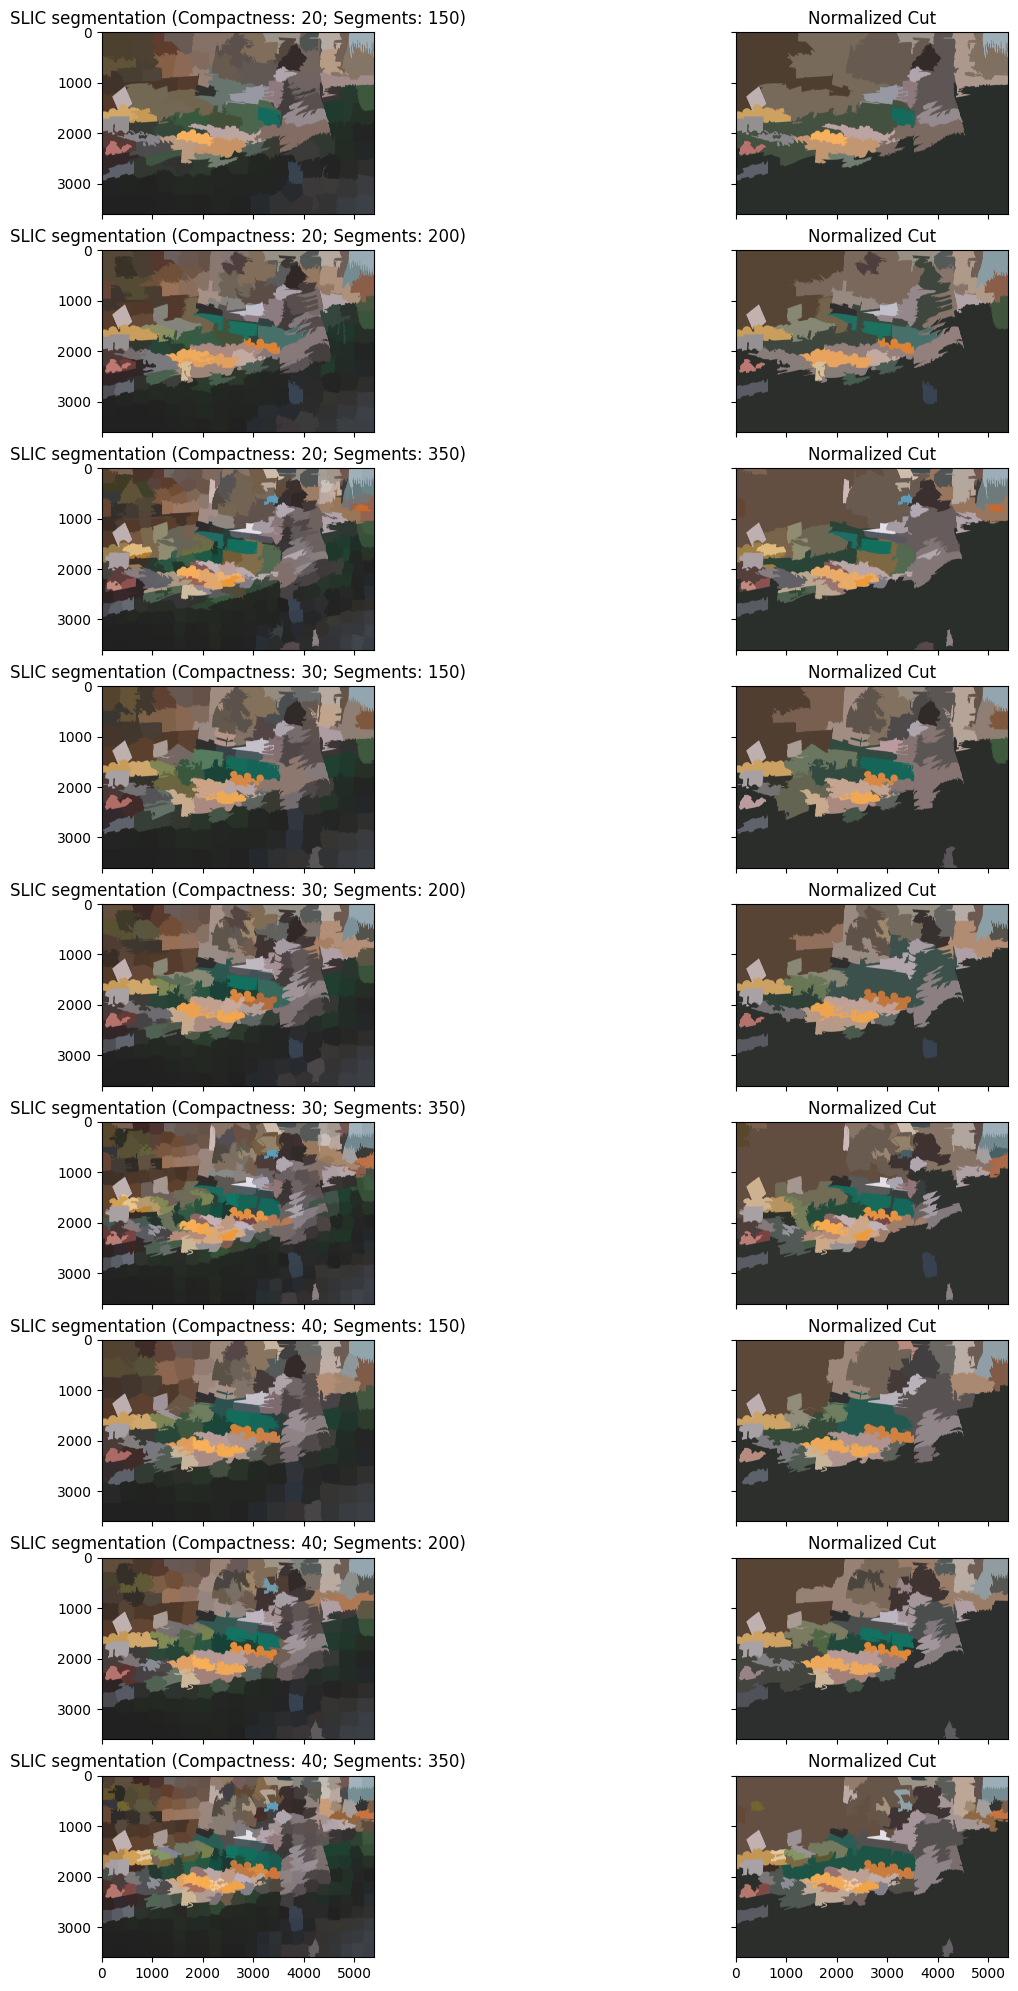

In [ ]:
## Evaluate the model with different parameters:
compactness_list = [20, 30, 40]
n_segments_list = [150, 200, 350]

# Display the results
fig, axes = plt.subplots(nrows=9, ncols=2, sharex=True, sharey=True, figsize=(15, 25))

ax_count = 0
for i, compact in enumerate(compactness_list):
  for j, seg in enumerate(n_segments_list):
    # Perform a quick SLIC segmentation first
    labels1 = segmentation.slic(image, compactness=compact, n_segments=seg)
    out1 = color.label2rgb(labels1, image, kind='avg')

    # Create the region adjacency graph
    g = graph.rag_mean_color(image, labels1, mode='similarity')

    # Perform the Normalized Cut
    labels2 = graph.cut_normalized(labels1, g)
    out2 = color.label2rgb(labels2, image, kind='avg', bg_label=0)

    # Show results
    axes[ax_count][0].imshow(out1)
    axes[ax_count][0].set_title(f'SLIC segmentation (Compactness: {compact}; Segments: {seg})')

    axes[ax_count][1].imshow(out2)
    axes[ax_count][1].set_title('Normalized Cut')

    ax_count += 1


In [ ]:
for a in axes.flatten():
  a.axis('off')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>